## Data
### Breast Cancer Wisconsin (Diagnostic) Dataset
The data used in the project is UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.


## Objective
Our objective here is to predict whether the cancer is malignant(1) or benign(0), depending on the features of cancer, this can be done with a simple classification model, but we would take the help of Neural Networks for higher accuracy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [4]:
df = pd.read_csv('C:/Users/DK/OneDrive/Desktop/udemy/TensorFlow_FILES/DATA/cancer_classification.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [7]:
df['Target'] = df['benign_0__mal_1']

In [8]:
df = df.drop('benign_0__mal_1', axis = 1)

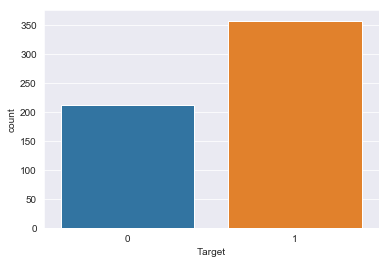

In [9]:
sns.set_style('darkgrid')
sns.countplot(df['Target'])

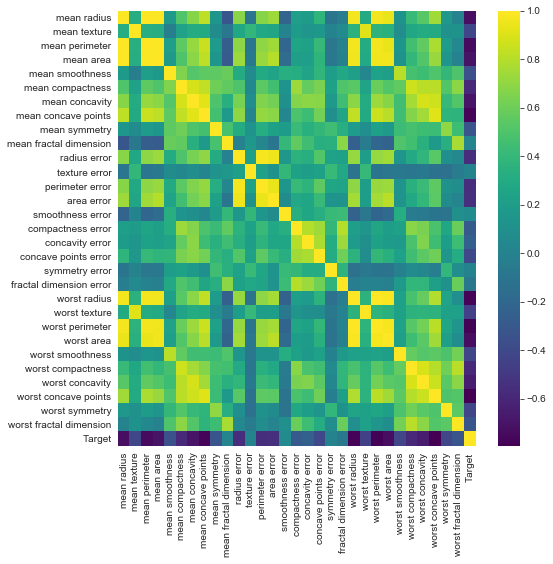

In [10]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), cmap = 'viridis')

In [11]:
df.corr()['Target'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

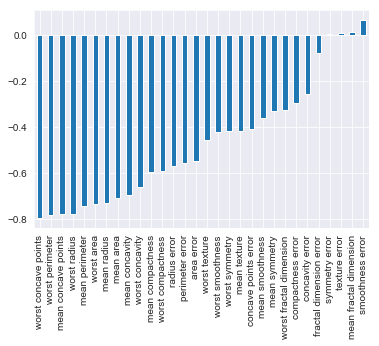

In [12]:
df.corr()['Target'][:-1].sort_values().plot(kind = 'bar')

### Train and Test Split

In [13]:
X = df.drop('Target', axis=1)
y = df['Target']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
scaler = MinMaxScaler()

In [16]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss= 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [18]:
model.fit(x= X_train, y = y_train.values,
          validation_data = (X_test, y_test.values), epochs = 600,
          batch_size = 64)

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 2s 4ms/step - loss: 0.7168 - acc: 0.6291 - val_loss: 0.6985 - val_acc: 0.6224
Epoch 2/600
426/426 [==============================] - 0s 176us/step - loss: 0.6815 - acc: 0.6291 - val_loss: 0.6652 - val_acc: 0.6224
Epoch 3/600
426/426 [==============================] - 0s 89us/step - loss: 0.6578 - acc: 0.6291 - val_loss: 0.6425 - val_acc: 0.6224
Epoch 4/600
426/426 [==============================] - 0s 103us/step - loss: 0.6413 - acc: 0.6620 - val_loss: 0.6220 - val_acc: 0.7343
Epoch 5/600
426/426 [==============================] - 0s 103us/step - loss: 0.6227 - acc: 0.7418 - val_loss: 0.5987 - val_acc: 0.7762
Epoch 6/600
426/426 [==============================] - 0s 110us/step - loss: 0.6026 - acc: 0.7770 - val_loss: 0.5749 - val_acc: 0.7832
Epoch 7/600
426/426 [==============================] - 0s 96us/step - loss: 0.5802 - acc: 0.7817 - val_loss: 0.5483 - val_acc: 0.8112
Epoch 8/600
4

426/426 [==============================] - 0s 110us/step - loss: 0.0941 - acc: 0.9812 - val_loss: 0.0725 - val_acc: 0.9860
Epoch 62/600
426/426 [==============================] - 0s 112us/step - loss: 0.0904 - acc: 0.9812 - val_loss: 0.0705 - val_acc: 0.9860
Epoch 63/600
426/426 [==============================] - 0s 101us/step - loss: 0.0895 - acc: 0.9812 - val_loss: 0.0705 - val_acc: 0.9860
Epoch 64/600
426/426 [==============================] - 0s 105us/step - loss: 0.0882 - acc: 0.9789 - val_loss: 0.0683 - val_acc: 0.9860
Epoch 65/600
426/426 [==============================] - 0s 129us/step - loss: 0.0864 - acc: 0.9765 - val_loss: 0.0691 - val_acc: 0.9860
Epoch 66/600
426/426 [==============================] - 0s 134us/step - loss: 0.0854 - acc: 0.9789 - val_loss: 0.0685 - val_acc: 0.9860
Epoch 67/600
426/426 [==============================] - 0s 115us/step - loss: 0.0844 - acc: 0.9812 - val_loss: 0.0679 - val_acc: 0.9860
Epoch 68/600
426/426 [==============================] - 0s 10

Epoch 120/600
426/426 [==============================] - 0s 122us/step - loss: 0.0558 - acc: 0.9859 - val_loss: 0.0545 - val_acc: 0.9860
Epoch 121/600
426/426 [==============================] - 0s 117us/step - loss: 0.0561 - acc: 0.9812 - val_loss: 0.0517 - val_acc: 0.9860
Epoch 122/600
426/426 [==============================] - 0s 136us/step - loss: 0.0550 - acc: 0.9812 - val_loss: 0.0544 - val_acc: 0.9860
Epoch 123/600
426/426 [==============================] - 0s 127us/step - loss: 0.0551 - acc: 0.9859 - val_loss: 0.0547 - val_acc: 0.9860
Epoch 124/600
426/426 [==============================] - 0s 131us/step - loss: 0.0541 - acc: 0.9812 - val_loss: 0.0505 - val_acc: 0.9860
Epoch 125/600
426/426 [==============================] - 0s 110us/step - loss: 0.0543 - acc: 0.9859 - val_loss: 0.0515 - val_acc: 0.9860
Epoch 126/600
426/426 [==============================] - 0s 105us/step - loss: 0.0538 - acc: 0.9836 - val_loss: 0.0537 - val_acc: 0.9860
Epoch 127/600
426/426 [==================

Epoch 180/600
426/426 [==============================] - 0s 96us/step - loss: 0.0445 - acc: 0.9859 - val_loss: 0.0533 - val_acc: 0.9860
Epoch 181/600
426/426 [==============================] - 0s 89us/step - loss: 0.0461 - acc: 0.9883 - val_loss: 0.0541 - val_acc: 0.9860
Epoch 182/600
426/426 [==============================] - 0s 127us/step - loss: 0.0483 - acc: 0.9859 - val_loss: 0.0490 - val_acc: 0.9790
Epoch 183/600
426/426 [==============================] - 0s 86us/step - loss: 0.0452 - acc: 0.9859 - val_loss: 0.0572 - val_acc: 0.9860
Epoch 184/600
426/426 [==============================] - 0s 115us/step - loss: 0.0453 - acc: 0.9883 - val_loss: 0.0527 - val_acc: 0.9860
Epoch 185/600
426/426 [==============================] - 0s 110us/step - loss: 0.0452 - acc: 0.9859 - val_loss: 0.0489 - val_acc: 0.9790
Epoch 186/600
426/426 [==============================] - 0s 120us/step - loss: 0.0440 - acc: 0.9883 - val_loss: 0.0558 - val_acc: 0.9860
Epoch 187/600
426/426 [=====================

Epoch 240/600
426/426 [==============================] - 0s 105us/step - loss: 0.0371 - acc: 0.9883 - val_loss: 0.0632 - val_acc: 0.9720
Epoch 241/600
426/426 [==============================] - 0s 117us/step - loss: 0.0378 - acc: 0.9883 - val_loss: 0.0573 - val_acc: 0.9790
Epoch 242/600
426/426 [==============================] - 0s 103us/step - loss: 0.0372 - acc: 0.9883 - val_loss: 0.0578 - val_acc: 0.9790
Epoch 243/600
426/426 [==============================] - 0s 101us/step - loss: 0.0376 - acc: 0.9883 - val_loss: 0.0599 - val_acc: 0.9790
Epoch 244/600
426/426 [==============================] - 0s 96us/step - loss: 0.0371 - acc: 0.9883 - val_loss: 0.0563 - val_acc: 0.9720
Epoch 245/600
426/426 [==============================] - 0s 84us/step - loss: 0.0372 - acc: 0.9883 - val_loss: 0.0632 - val_acc: 0.9790
Epoch 246/600
426/426 [==============================] - 0s 84us/step - loss: 0.0364 - acc: 0.9930 - val_loss: 0.0572 - val_acc: 0.9720
Epoch 247/600
426/426 [=====================

426/426 [==============================] - 0s 96us/step - loss: 0.0313 - acc: 0.9906 - val_loss: 0.0661 - val_acc: 0.9720
Epoch 300/600
426/426 [==============================] - 0s 112us/step - loss: 0.0324 - acc: 0.9906 - val_loss: 0.0753 - val_acc: 0.9790
Epoch 301/600
426/426 [==============================] - 0s 77us/step - loss: 0.0330 - acc: 0.9906 - val_loss: 0.0641 - val_acc: 0.9790
Epoch 302/600
426/426 [==============================] - 0s 91us/step - loss: 0.0326 - acc: 0.9906 - val_loss: 0.0737 - val_acc: 0.9790
Epoch 303/600
426/426 [==============================] - 0s 89us/step - loss: 0.0316 - acc: 0.9930 - val_loss: 0.0662 - val_acc: 0.9720
Epoch 304/600
426/426 [==============================] - 0s 94us/step - loss: 0.0311 - acc: 0.9906 - val_loss: 0.0720 - val_acc: 0.9790
Epoch 305/600
426/426 [==============================] - 0s 87us/step - loss: 0.0323 - acc: 0.9930 - val_loss: 0.0727 - val_acc: 0.9790
Epoch 306/600
426/426 [==============================] - 0s 8

Epoch 359/600
426/426 [==============================] - 0s 152us/step - loss: 0.0289 - acc: 0.9930 - val_loss: 0.0742 - val_acc: 0.9790
Epoch 360/600
426/426 [==============================] - 0s 115us/step - loss: 0.0244 - acc: 0.9930 - val_loss: 0.0898 - val_acc: 0.9720
Epoch 361/600
426/426 [==============================] - 0s 110us/step - loss: 0.0262 - acc: 0.9930 - val_loss: 0.0819 - val_acc: 0.9790
Epoch 362/600
426/426 [==============================] - 0s 129us/step - loss: 0.0254 - acc: 0.9906 - val_loss: 0.0786 - val_acc: 0.9790
Epoch 363/600
426/426 [==============================] - 0s 122us/step - loss: 0.0251 - acc: 0.9930 - val_loss: 0.0879 - val_acc: 0.9720
Epoch 364/600
426/426 [==============================] - 0s 148us/step - loss: 0.0258 - acc: 0.9930 - val_loss: 0.0778 - val_acc: 0.9790
Epoch 365/600
426/426 [==============================] - 0s 115us/step - loss: 0.0252 - acc: 0.9930 - val_loss: 0.0815 - val_acc: 0.9860
Epoch 366/600
426/426 [==================

Epoch 419/600
426/426 [==============================] - 0s 122us/step - loss: 0.0219 - acc: 0.9953 - val_loss: 0.1131 - val_acc: 0.9650
Epoch 420/600
426/426 [==============================] - 0s 148us/step - loss: 0.0221 - acc: 0.9930 - val_loss: 0.0891 - val_acc: 0.9790
Epoch 421/600
426/426 [==============================] - 0s 131us/step - loss: 0.0200 - acc: 0.9930 - val_loss: 0.0925 - val_acc: 0.9790
Epoch 422/600
426/426 [==============================] - 0s 136us/step - loss: 0.0229 - acc: 0.9930 - val_loss: 0.1004 - val_acc: 0.9720
Epoch 423/600
426/426 [==============================] - 0s 98us/step - loss: 0.0209 - acc: 0.9930 - val_loss: 0.0862 - val_acc: 0.9790
Epoch 424/600
426/426 [==============================] - 0s 127us/step - loss: 0.0203 - acc: 0.9930 - val_loss: 0.0941 - val_acc: 0.9720
Epoch 425/600
426/426 [==============================] - 0s 134us/step - loss: 0.0228 - acc: 0.9930 - val_loss: 0.0966 - val_acc: 0.9720
Epoch 426/600
426/426 [===================

426/426 [==============================] - 0s 129us/step - loss: 0.0189 - acc: 0.9953 - val_loss: 0.1096 - val_acc: 0.9720
Epoch 479/600
426/426 [==============================] - 0s 127us/step - loss: 0.0188 - acc: 0.9953 - val_loss: 0.0984 - val_acc: 0.9790
Epoch 480/600
426/426 [==============================] - 0s 127us/step - loss: 0.0147 - acc: 0.9953 - val_loss: 0.1149 - val_acc: 0.9720
Epoch 481/600
426/426 [==============================] - 0s 105us/step - loss: 0.0210 - acc: 0.9953 - val_loss: 0.1079 - val_acc: 0.9650
Epoch 482/600
426/426 [==============================] - 0s 122us/step - loss: 0.0230 - acc: 0.9883 - val_loss: 0.1000 - val_acc: 0.9720
Epoch 483/600
426/426 [==============================] - 0s 124us/step - loss: 0.0225 - acc: 0.9953 - val_loss: 0.1254 - val_acc: 0.9650
Epoch 484/600
426/426 [==============================] - 0s 148us/step - loss: 0.0158 - acc: 0.9953 - val_loss: 0.0994 - val_acc: 0.9790
Epoch 485/600
426/426 [==============================] 

Epoch 538/600
426/426 [==============================] - 0s 120us/step - loss: 0.0140 - acc: 0.9953 - val_loss: 0.1236 - val_acc: 0.9720
Epoch 539/600
426/426 [==============================] - 0s 115us/step - loss: 0.0131 - acc: 0.9977 - val_loss: 0.1153 - val_acc: 0.9650
Epoch 540/600
426/426 [==============================] - 0s 152us/step - loss: 0.0125 - acc: 0.9977 - val_loss: 0.1289 - val_acc: 0.9720
Epoch 541/600
426/426 [==============================] - 0s 131us/step - loss: 0.0131 - acc: 0.9977 - val_loss: 0.1221 - val_acc: 0.9720
Epoch 542/600
426/426 [==============================] - 0s 143us/step - loss: 0.0126 - acc: 0.9953 - val_loss: 0.1201 - val_acc: 0.9650
Epoch 543/600
426/426 [==============================] - 0s 115us/step - loss: 0.0131 - acc: 0.9977 - val_loss: 0.1216 - val_acc: 0.9650
Epoch 544/600
426/426 [==============================] - 0s 127us/step - loss: 0.0126 - acc: 0.9977 - val_loss: 0.1233 - val_acc: 0.9720
Epoch 545/600
426/426 [==================

Epoch 598/600
426/426 [==============================] - 0s 84us/step - loss: 0.0109 - acc: 0.9977 - val_loss: 0.1360 - val_acc: 0.9650
Epoch 599/600
426/426 [==============================] - 0s 89us/step - loss: 0.0103 - acc: 0.9977 - val_loss: 0.1429 - val_acc: 0.9650
Epoch 600/600
426/426 [==============================] - 0s 97us/step - loss: 0.0109 - acc: 1.0000 - val_loss: 0.1421 - val_acc: 0.9720


In [19]:
loss_1 = pd.DataFrame(model.history.history)

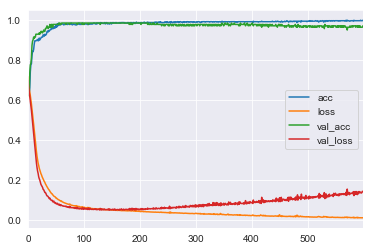

In [20]:
loss_1.plot()

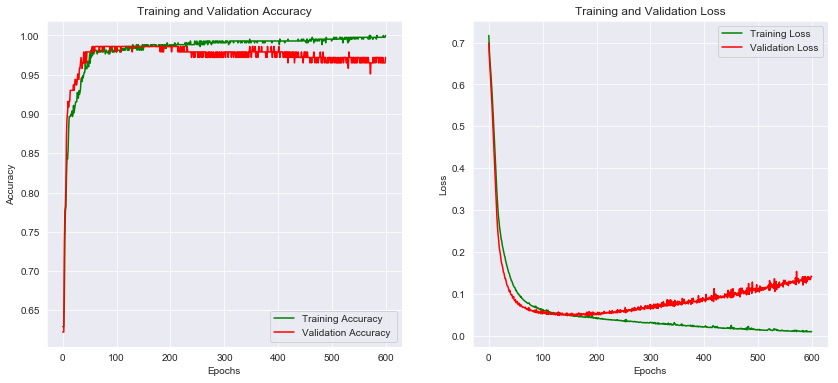

In [23]:
epochs = [i for i in range(600)]
fig, ax = plt.subplots(1,2)

ax[0].plot(epochs, model.history.history['acc'], 'g-', label = 'Training Accuracy')
ax[0].plot(epochs, model.history.history['val_acc'], 'r-', label = 'Validation Accuracy ')
ax[0].set_title('Training and Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(epochs, model.history.history['loss'], 'g-', label = 'Training Loss')
ax[1].plot(epochs, model.history.history['val_loss'], 'r-', label = 'Validation Loss')
ax[1].set_title('Training and Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

fig.set_size_inches(14,6)

In [24]:
predictions_1 = model.predict_classes(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
print(classification_report(y_test,predictions_1))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        54
           1       0.99      0.97      0.98        89

   micro avg       0.97      0.97      0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [29]:
print(confusion_matrix(y_test,predictions_1))

[[53  1]
 [ 3 86]]


In [31]:
accuracy_1 = accuracy_score(y_test, predictions_1) * 100
accuracy_1

97.2027972027972

##### It can be noticed that validation loss is high and validation accuracy is low, this is because of the reason that we may have overfit the data, let's try to decrease the validaation loss by performing early stopping.

### Model with Early Stopping 
Let's run the same model but this time we will also include early stopping 

In [32]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [53]:
model_2 = Sequential()

model_2.add(Dense(45, activation= 'relu'))
model_2.add(Dropout(0.5))

model_2.add(Dense(30, activation='relu'))
model_2.add(Dropout(0.5))

model_2.add(Dense(15, activation='relu'))
model_2.add(Dropout(0.5))

model_2.add(Dense(1, activation='sigmoid'))

model_2.compile(loss= 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [54]:
model_2.fit(x=X_train, y= y_train.values,
          validation_data = (X_test, y_test.values), 
          epochs = 400, batch_size = 64, 
          callbacks = [early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/400
426/426 [==============================] - 2s 5ms/step - loss: 0.7043 - acc: 0.5704 - val_loss: 0.6805 - val_acc: 0.6294
Epoch 2/400
426/426 [==============================] - 0s 137us/step - loss: 0.6917 - acc: 0.5939 - val_loss: 0.6630 - val_acc: 0.6783
Epoch 3/400
426/426 [==============================] - 0s 127us/step - loss: 0.6964 - acc: 0.5915 - val_loss: 0.6492 - val_acc: 0.7552
Epoch 4/400
426/426 [==============================] - ETA: 0s - loss: 0.6940 - acc: 0.640 - 0s 127us/step - loss: 0.6827 - acc: 0.6103 - val_loss: 0.6366 - val_acc: 0.8112
Epoch 5/400
426/426 [==============================] - 0s 131us/step - loss: 0.6723 - acc: 0.6197 - val_loss: 0.6252 - val_acc: 0.8252
Epoch 6/400
426/426 [==============================] - 0s 122us/step - loss: 0.6599 - acc: 0.6408 - val_loss: 0.6135 - val_acc: 0.7972
Epoch 7/400
426/426 [==============================] - 0s 131us/step - loss: 0.6545 - acc: 0.6408 - val_loss

Epoch 60/400
426/426 [==============================] - 0s 134us/step - loss: 0.1888 - acc: 0.9319 - val_loss: 0.0725 - val_acc: 0.9790
Epoch 61/400
426/426 [==============================] - 0s 117us/step - loss: 0.1470 - acc: 0.9624 - val_loss: 0.0741 - val_acc: 0.9720
Epoch 62/400
426/426 [==============================] - 0s 134us/step - loss: 0.1786 - acc: 0.9319 - val_loss: 0.0658 - val_acc: 0.9790
Epoch 63/400
426/426 [==============================] - 0s 138us/step - loss: 0.1696 - acc: 0.9343 - val_loss: 0.0664 - val_acc: 0.9790
Epoch 64/400
426/426 [==============================] - 0s 128us/step - loss: 0.1799 - acc: 0.9437 - val_loss: 0.0666 - val_acc: 0.9790
Epoch 65/400
426/426 [==============================] - 0s 122us/step - loss: 0.1777 - acc: 0.9296 - val_loss: 0.0663 - val_acc: 0.9790
Epoch 66/400
426/426 [==============================] - 0s 122us/step - loss: 0.1733 - acc: 0.9531 - val_loss: 0.0674 - val_acc: 0.9790
Epoch 67/400
426/426 [==========================

426/426 [==============================] - 0s 155us/step - loss: 0.0740 - acc: 0.9812 - val_loss: 0.0524 - val_acc: 0.9790
Epoch 121/400
426/426 [==============================] - 0s 157us/step - loss: 0.0792 - acc: 0.9765 - val_loss: 0.0691 - val_acc: 0.9720
Epoch 122/400
426/426 [==============================] - 0s 187us/step - loss: 0.1058 - acc: 0.9624 - val_loss: 0.0671 - val_acc: 0.9720
Epoch 123/400
426/426 [==============================] - 0s 155us/step - loss: 0.0992 - acc: 0.9648 - val_loss: 0.0607 - val_acc: 0.9790
Epoch 124/400
426/426 [==============================] - 0s 134us/step - loss: 0.0614 - acc: 0.9906 - val_loss: 0.0592 - val_acc: 0.9790
Epoch 125/400
426/426 [==============================] - 0s 146us/step - loss: 0.0834 - acc: 0.9765 - val_loss: 0.0545 - val_acc: 0.9790
Epoch 126/400
426/426 [==============================] - 0s 131us/step - loss: 0.1106 - acc: 0.9695 - val_loss: 0.0647 - val_acc: 0.9790
Epoch 127/400
426/426 [==============================] 

Epoch 180/400
426/426 [==============================] - 0s 155us/step - loss: 0.0674 - acc: 0.9812 - val_loss: 0.0521 - val_acc: 0.9860
Epoch 181/400
426/426 [==============================] - 0s 149us/step - loss: 0.0898 - acc: 0.9695 - val_loss: 0.0674 - val_acc: 0.9580
Epoch 182/400
426/426 [==============================] - 0s 145us/step - loss: 0.0847 - acc: 0.9718 - val_loss: 0.0503 - val_acc: 0.9790
Epoch 183/400
426/426 [==============================] - 0s 169us/step - loss: 0.0642 - acc: 0.9789 - val_loss: 0.0546 - val_acc: 0.9860
Epoch 00183: early stopping


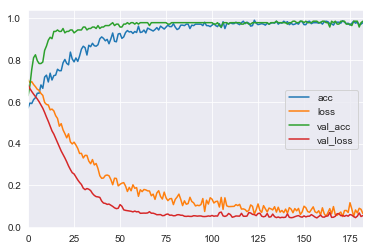

In [55]:
loss_2 = pd.DataFrame(model_2.history.history)
loss_2.plot()

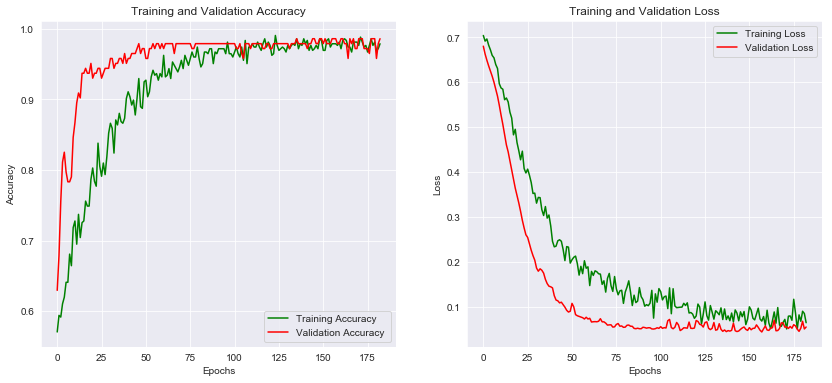

In [57]:
epochs = [i for i in range(183)]
fig, ax = plt.subplots(1,2)

ax[0].plot(epochs, model_2.history.history['acc'], 'g-', label = 'Training Accuracy')
ax[0].plot(epochs, model_2.history.history['val_acc'], 'r-', label = 'Validation Accuracy ')
ax[0].set_title('Training and Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(epochs, model_2.history.history['loss'], 'g-', label = 'Training Loss')
ax[1].plot(epochs, model_2.history.history['val_loss'], 'r-', label = 'Validation Loss')
ax[1].set_title('Training and Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

fig.set_size_inches(14,6)

In [58]:
predictions_2 = model_2.predict_classes(X_test)

In [59]:
print(classification_report(y_test,predictions_2))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        54
           1       0.98      1.00      0.99        89

   micro avg       0.99      0.99      0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143



In [60]:
print(confusion_matrix(y_test,predictions_2))

[[52  2]
 [ 0 89]]


In [61]:
accuracy_2 = accuracy_score(y_test, predictions_2) * 100
accuracy_2

98.6013986013986

In [64]:
data = {'Accuracy':[accuracy_1, accuracy_2],'Model': ['Model 1', 'Model 2']}
Accuracy = pd.DataFrame(data)

In [65]:
Accuracy

,Accuracy,Model
0,97.202797,Model 1
1,98.601399,Model 2
